In [1]:
# mounting google drive to colab virtual machine

from google.colab import drive
drive.mount('/content/drive', force_remount=True)





Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/CACD_preprocess/'
/content


In [9]:
%cd '/content/drive/MyDrive/DL_Project/Preprocessing/'

/content/drive/MyDrive/DL_Project/Preprocessing


In [3]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 25 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=4b99f22a9b3485c10c0ec6c762144a61c60820663ac6119ae5a2515606287996
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [4]:
import numpy as np
import pandas as pd
import cv2
import os
import face_recognition
from PIL import Image
import shutil
import re
import glob
import ntpath
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [12]:
# replace this image directory with yours

path = './test/' 

# directory path
orig_path = path

# folder to store the image
out_path = os.path.join(path, 'CACD_centered')

keep_picture=[]
if not os.path.exists(orig_path):
    raise ValueError(f'Original image path {orig_path} does not exist.')

if not os.path.exists(out_path):
    os.mkdir(out_path)

# looping through the images in your image directory

for picture_name in os.listdir(orig_path)[:-1]:
    stream = open(os.path.join(orig_path, picture_name), "rb") #read binary
    bytes = bytearray(stream.read()) #store the bytearray
    numpyarray = np.asarray(bytes, dtype=np.uint8) #convert to numpy array
    img = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)  #decode and open the image using cv2
    stream.close()
    
        
    #img = cv2.imread(os.path.join(orig_path, picture_name))
    
    
    #fiding face locations
    print(picture_name)
    faces=face_recognition.face_locations(img)
    
    if len(faces) !=1:
            shutil.move(os.path.join(orig_path, picture_name), './test/')
        
    #iterating each face
    for face in faces:
        #file name with face location
        
        if len(faces) !=1:
            continue
        
        t = face[0]  # top location
        r = face[1]  # right location
        b = face[2]  # bottom location
        l = face[3]  # left location


        # just checking Raschka code from here
        width = r - l # width is right minus left
        height = b - t # height is bottom minus top
        diff =  height-width
        tol = 15 # additional increment
        up_down = 5

                
        if(diff > 0):#if height is greater than width -> adding access dimension left and right and moving up by 5 + tol
            if not diff % 2:  # if symmetric
                t=t-tol-up_down 
                b=b+tol-up_down
                l=l-tol-int(diff/2)
                r=r+tol+int(diff/2)
                tmp = img[(t):(b),(l):(r),:]
            else:
                t=t-tol-up_down
                b=b+tol-up_down
                l=l-tol-int((diff-1)/2)
                r=r+tol+int((diff+1)/2)
                tmp = img[(t):(b),(l):(r),:]
        if(diff <= 0):#if width is greater than hight -> adding access dimension to up and down and moving up by 5 +tol
            if not diff % 2:  # symmetric
                t=t-tol-int(diff/2)-up_down
                b=b+tol+int(diff/2)-up_down
                l=l-tol
                r=r+tol
                tmp = img[(t):(b),(l):(r),:]
            else:
                t=t-tol-int((diff-1)/2)-up_down
                b=b+tol+int((diff+1)/2)-up_down
                l=l-tol
                r=r+tol
                tmp = img[(t):(b),(l):(r),:]
    
        
        try:
            tmp = np.array(Image.fromarray(np.uint8(tmp)).resize((120, 120), Image.ANTIALIAS))
            #A UINT8 is an 8-bit unsigned integer (range: 0 through 255 decimal). 
            #Because a UINT8 is unsigned, its first bit (Most Significant Bit (MSB)) is not reserved for signing
            
            #anti-aliasing is a technique for minimizing the distortion artifacts known as aliasing 
            #when representing a high-resolution image at a lower resolution
            
            #This function converts a numerical (integer or float) numpy array of any size and dimensionality into a image
            cv2.imwrite(os.path.join(out_path, picture_name), tmp)
            print(f'Wrote {picture_name}')
            keep_picture.append(picture_name)
            shutil.move(os.path.join(orig_path, picture_name), './CACD2000.tar/processed')
        except ValueError:
            print(f'Failed {picture_name}')
            shutil.move(os.path.join(orig_path, picture_name), './CACD2000.tar/failed')
            pass       

0004_0.jpg
Wrote 0004_0.jpg
0004_1.jpg
Wrote 0004_1.jpg


In [ ]:
len(keep_picture)

159356

In [ ]:
age=[]
for pic in keep_picture:
    age.append(int(pic[:2]))

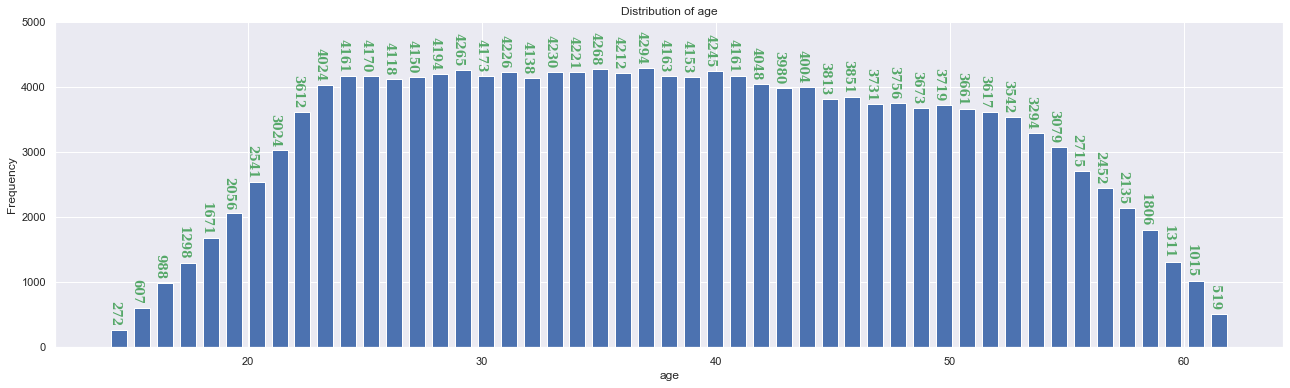

In [ ]:

font = {'family': 'serif',
        'color':  'g',
        'weight': 'bold',
        'size': 12,
        }
#plt.rcParams["figure.figsize"] = (22,10)
plt.figure(figsize=(22,6))
arr= plt.hist(x=age, bins=np.count_nonzero(np.unique(age)), align='mid',rwidth=.7,color='b')
for i in range(np.count_nonzero(np.unique(age))):
    plt.text(arr[1][i],arr[0][i]+100,int(arr[0][i]),fontdict=font,rotation=-90)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Distribution of age')
bottom, top = plt.ylim()
plt.ylim((bottom,top+500))


plt.show()

**Reference : **

https://github.com/Raschka-research-group/coral-cnn